<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n20.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.666633,54.519315,97.817156,193.003104,105.738524,87.264580
1,0.0,1.0,76.057437,84.436829,-404.331588,-233.837322,87.247932,-321.085253
2,0.0,2.0,49.215922,95.703244,-65.434463,89.484703,85.466922,4.017781
3,0.0,3.0,95.698592,20.888248,38.785540,165.372380,112.835093,52.537287
4,0.0,4.0,44.014707,71.933483,117.117261,243.065451,96.517608,146.547843
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.528366,81.903859,-373.841932,-243.409707,109.528915,-352.938622
119996,999.0,116.0,86.648776,71.465802,222.549914,390.664492,165.274166,225.390326
119997,999.0,117.0,86.727979,23.708879,-56.437868,63.998990,141.321457,-77.322467
119998,999.0,118.0,96.915615,57.673706,114.706277,279.295598,171.342995,107.952604


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.666633,54.519315,97.817156,193.003104,105.738524,87.264580
1,0.0,1.0,76.057437,84.436829,-404.331588,-233.837322,87.247932,-321.085253
2,0.0,2.0,49.215922,95.703244,-65.434463,89.484703,85.466922,4.017781
3,0.0,3.0,95.698592,20.888248,38.785540,165.372380,112.835093,52.537287
4,0.0,4.0,44.014707,71.933483,117.117261,243.065451,96.517608,146.547843
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.528366,81.903859,-373.841932,-243.409707,109.528915,-352.938622
119996,999.0,116.0,86.648776,71.465802,222.549914,390.664492,165.274166,225.390326
119997,999.0,117.0,86.727979,23.708879,-56.437868,63.998990,141.321457,-77.322467
119998,999.0,118.0,96.915615,57.673706,114.706277,279.295598,171.342995,107.952604


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    30.666633  54.519315   97.817156  193.003104  105.738524   
      1.0    76.057437  84.436829 -404.331588 -233.837322   87.247932   
      2.0    49.215922  95.703244  -65.434463   89.484703   85.466922   
      3.0    95.698592  20.888248   38.785540  165.372380  112.835093   
      4.0    44.014707  71.933483  117.117261  243.065451   96.517608   
...                ...        ...         ...         ...         ...   
999.0 115.0  38.528366  81.903859 -373.841932 -243.409707  109.528915   
      116.0  86.648776  71.465802  222.549914  390.664492  165.274166   
      117.0  86.727979  23.708879  -56.437868   63.998990  141.321457   
      118.0  96.915615  57.673706  114.706277  279.295598  171.342995   
      119.0  43.853662  92.727698 -650.122256 -503.540896  121.731320   

                  e_hat  
rep   index              
0.0   0.0     87.264580  
      1.0   -321.085253  
      2.0      4.017781  
      3.0     52.537287  
      4.0    146.547843  
...                 ...  
999.0 115.0 -352.938622  
      116.0  225.390326  
      117.0  -77.322467  
      118.0  107.952604  
      119.0 -625.272216  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    30.666633  54.519315   97.817156  193.003104  105.738524   
      1.0    76.057437  84.436829 -404.331588 -233.837322   87.247932   
      2.0    49.215922  95.703244  -65.434463   89.484703   85.466922   
      3.0    95.698592  20.888248   38.785540  165.372380  112.835093   
      4.0    44.014707  71.933483  117.117261  243.065451   96.517608   
...                ...        ...         ...         ...         ...   
999.0 115.0  38.528366  81.903859 -373.841932 -243.409707  109.528915   
      116.0  86.648776  71.465802  222.549914  390.664492  165.274166   
      117.0  86.727979  23.708879  -56.437868   63.998990  141.321457   
      118.0  96.915615  57.673706  114.706277  279.295598  171.342995   
      119.0  43.853662  92.727698 -650.122256 -503.540896  121.731320   

                  e_hat  
rep   index              
0.0   0.0     87.264580  
      1.0   -321.085253  
      2.0      4.017781  
      3.0     52.537287  
      4.0    146.547843  
...                 ...  
999.0 115.0 -352.938622  
      116.0  225.390326  
      117.0  -77.322467  
      118.0  107.952604  
      119.0 -625.272216  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.666633,54.519315,97.817156,193.003104,105.738524,87.264580
1,0.0,1.0,76.057437,84.436829,-404.331588,-233.837322,87.247932,-321.085253
2,0.0,2.0,49.215922,95.703244,-65.434463,89.484703,85.466922,4.017781
3,0.0,3.0,95.698592,20.888248,38.785540,165.372380,112.835093,52.537287
4,0.0,4.0,44.014707,71.933483,117.117261,243.065451,96.517608,146.547843
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.528366,81.903859,-373.841932,-243.409707,109.528915,-352.938622
119996,999.0,116.0,86.648776,71.465802,222.549914,390.664492,165.274166,225.390326
119997,999.0,117.0,86.727979,23.708879,-56.437868,63.998990,141.321457,-77.322467
119998,999.0,118.0,96.915615,57.673706,114.706277,279.295598,171.342995,107.952604


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    30.666633  54.519315   97.817156  193.003104  105.738524   
      1.0    76.057437  84.436829 -404.331588 -233.837322   87.247932   
      2.0    49.215922  95.703244  -65.434463   89.484703   85.466922   
      3.0    95.698592  20.888248   38.785540  165.372380  112.835093   
      4.0    44.014707  71.933483  117.117261  243.065451   96.517608   
...                ...        ...         ...         ...         ...   
999.0 115.0  38.528366  81.903859 -373.841932 -243.409707  109.528915   
      116.0  86.648776  71.465802  222.549914  390.664492  165.274166   
      117.0  86.727979  23.708879  -56.437868   63.998990  141.321457   
      118.0  96.915615  57.673706  114.706277  279.295598  171.342995   
      119.0  43.853662  92.727698 -650.122256 -503.540896  121.731320   

                  e_hat  
rep   index              
0.0   0.0     87.264580  
      1.0   -321.085253  
      2.0      4.017781  
      3.0     52.537287  
      4.0    146.547843  
...                 ...  
999.0 115.0 -352.938622  
      116.0  225.390326  
      117.0  -77.322467  
      118.0  107.952604  
      119.0 -625.272216  

[120000 rows x 6 columns]

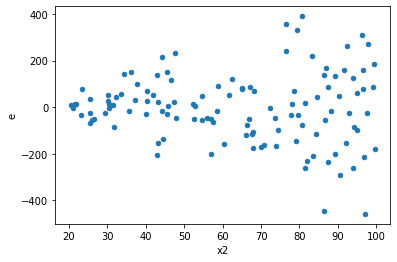

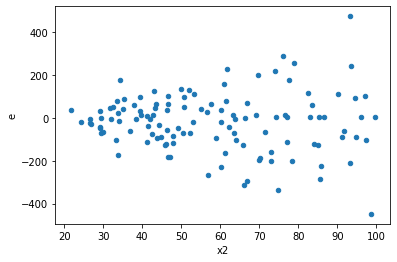

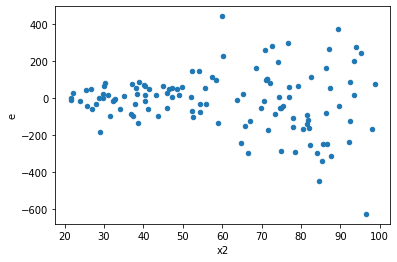

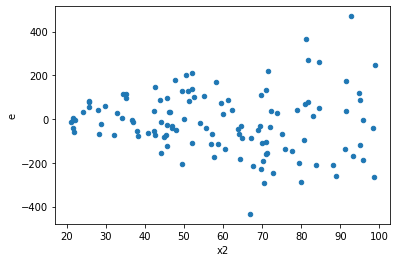

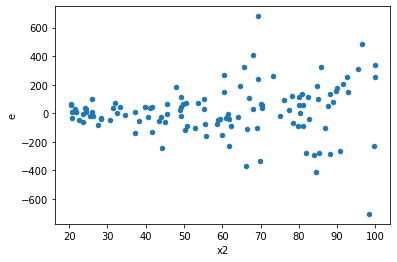

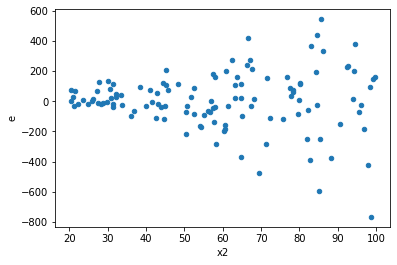

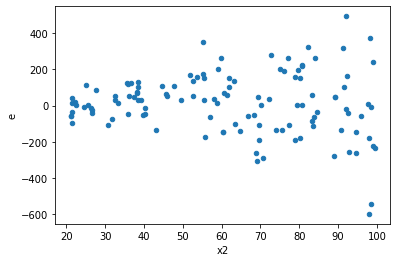

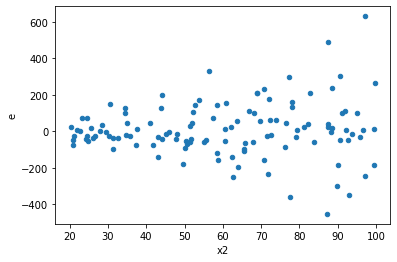

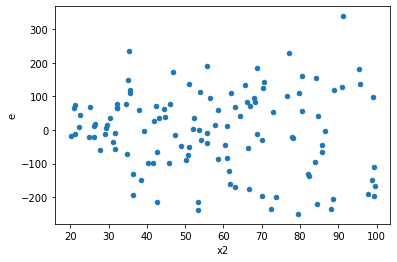

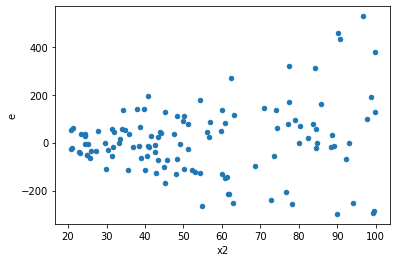

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,266644.62133482576,1922802.9354957812,5796.622202930995,41800.06381512568,7.211107150296937,5.033256034181477e-10,0.9999999997483372,2.5166280170907385e-10,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,196257.61848368452,2461618.275005529,4266.46996703662,53513.44076098977,12.54279091952892,1.532107773982716e-14,0.9999999999999923,7.66053886991358e-15,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,349755.01179723523,1947054.1580674427,7603.369821679027,42327.26430581397,5.566908528522289,4.1176104303985994e-08,0.9999999794119478,2.0588052151992997e-08,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,170328.02533821913,1798479.458697106,3702.783159526503,39097.37953689361,10.558916861308516,4.39648317751562e-13,0.9999999999997802,2.19824158875781e-13,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,166208.2055421508,1872098.4543406295,3613.2218596119737,40697.79248566586,11.263574191382872,1.2634338020234281e-13,0.9999999999999368,6.317169010117141e-14,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,277415.4607659187,1775297.9035778341,6030.770886215624,38593.432686474654,6.399419479636784,4.008195553240057e-09,0.9999999979959022,2.0040977766200285e-09,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,306422.2877216849,2146312.7124819513,6661.354080906193,46658.972010477206,7.004427544876858,8.395359962776183e-10,0.999999999580232,4.1976799813880916e-10,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,183047.00582412552,1804488.497872944,3979.2827353070766,39228.01082332487,9.858060719150606,1.6298074001497298e-12,0.9999999999991851,8.149037000748649e-13,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,154151.08016498236,2048837.2755350398,3351.110438369182,44539.940772500864,13.291099052580384,4.884981308350689e-15,0.9999999999999976,2.4424906541753444e-15,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,266644.62133482576,1922802.9354957812,5796.622202930995,41800.06381512568,7.211107150296937,5.033256034181477e-10,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,196257.61848368452,2461618.275005529,4266.46996703662,53513.44076098977,12.54279091952892,1.532107773982716e-14,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,349755.01179723523,1947054.1580674427,7603.369821679027,42327.26430581397,5.566908528522289,4.1176104303985994e-08,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,170328.02533821913,1798479.458697106,3702.783159526503,39097.37953689361,10.558916861308516,4.39648317751562e-13,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,166208.2055421508,1872098.4543406295,3613.2218596119737,40697.79248566586,11.263574191382872,1.2634338020234281e-13,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,277415.4607659187,1775297.9035778341,6030.770886215624,38593.432686474654,6.399419479636784,4.008195553240057e-09,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,306422.2877216849,2146312.7124819513,6661.354080906193,46658.972010477206,7.004427544876858,8.395359962776183e-10,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,183047.00582412552,1804488.497872944,3979.2827353070766,39228.01082332487,9.858060719150606,1.6298074001497298e-12,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,154151.08016498236,2048837.2755350398,3351.110438369182,44539.940772500864,13.291099052580384,4.884981308350689e-15,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64